# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<b>My Plan: </b>

I chose the book review dataset because I wanted to have some more experience with LLMs since I am very interested in the LLM/NLP related studio projects (like those from Accenture, American Express, DirectTV, and Verizon).

I will be using the 'Positive Review' column as my label so that my model predicts whether a given book review is positive or negative. This is a binary classification problem, since there are only two discrete classes or categories that an unlabeled example could have: true or false for being positive (ie positive or negative sentiment). Since the dataset only contains two columns, I will use the 'review' column as my only feature, which means that I will not be able to perform feature selection and see what features are the most important as I would for other models. This is an example of a superised learning problem since my datapoints are already labeled as having a positive or negative sentiment already.

This model will be impactful in a real-world context because it could be used by bookstores to analyze the ratio of positive to negative reviews of a certain book before they decide if they want to buy and stock that book in their store, because if a book has a larger or more split ration of positive to negative, then the book may not be popular and it may not be profitable for them to spend the money and resources on stocking that item. In addition, an author could also use this model to see if one of their books is doing well or not to see if they maybe want to capitalize on a text's popularity to make a sequel or invest more money in increasing marketing for it.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
'''from this we can see there there are zero missing values in both the 'Review' and 'Positive Review' columns
so we do not have to drop any rows with missing values (in this case we would have to drop rows with missing
values since there is nothing reasonable that we can replace a blank space with, so it is good that we do not 
have to do that'''

print(df.isna().sum())

Review             0
Positive Review    0
dtype: int64


False    993
True     980
Name: Positive Review, dtype: int64


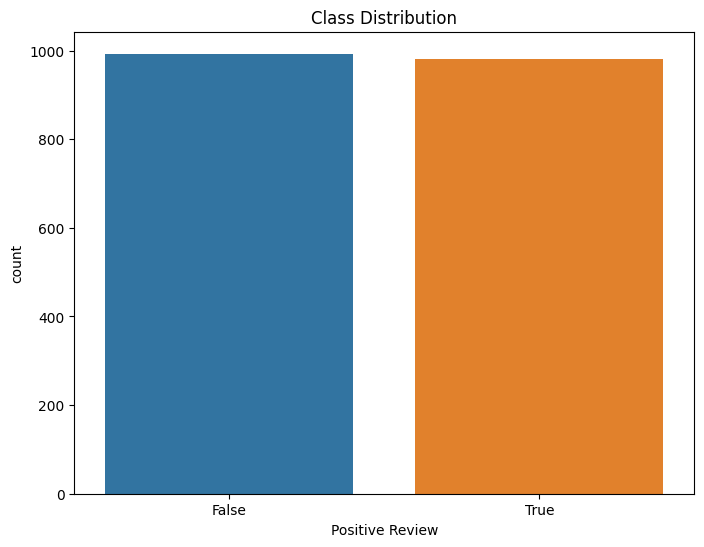

In [4]:
'''Now, let us check for class imbalance using a bar plot to see if we need to alter our training dataset. We can see that
since there are 993 negative examples and 980 positive ones, there is a good mix of both positive and negative examples,
so there is not class imbalance and we do not have to worry about creating a more equal training dataset in order
to optimize our model's performance'''

class_counts = df['Positive Review'].value_counts()

# Print class distribution
print(class_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Positive Review', data=df)
plt.title('Class Distribution')
plt.show()

In [5]:
!pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
import gensim

In [7]:
'''here, I am creating the feature and the label columns, with the label being 'Positive Reivew' and the 
feature being 'Review'''
X = df['Review']
y = df['Positive Review']

In [8]:
'''since I am doing a sentiment analysis project, I will proceed by preparing my data by creating word embeddings
and preprocessing the text in the feature column ('Review'). I will do this by downloading and importing the gensim
package for preprocessing the text'''
og_X = X
X = X.apply(lambda row: gensim.utils.simple_preprocess(row))

In [9]:
#lets print the two columns to see how they changed
og_X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

In [10]:
#we can see that the new X contains a list of the words and standardizes them by making everything lowercase
X.head()

0    [this, was, perhaps, the, best, of, johannes, ...
1    [this, very, fascinating, book, is, story, wri...
2    [the, four, tales, in, this, collection, are, ...
3    [the, book, contained, more, profanity, than, ...
4    [we, have, now, entered, second, time, of, dee...
Name: Review, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
'''Now, create the training and test datasets so that we can vectorize the text in the training datasets using
Word2Vec from gensim. We will create a training set that is 75% of the size of the original dataset'''
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=1234)

X_train.head()

500     [there, is, reason, this, book, has, sold, ove...
1047    [there, is, one, thing, that, every, cookbook,...
1667    [being, an, engineer, in, the, aerospace, indu...
1646    [have, no, idea, how, this, book, has, receive...
284     [it, is, almost, like, dream, comes, true, whe...
Name: Review, dtype: object

In [13]:
'''Now, I will vectorize the text in the 'Review' column using Word2Vec in the training dataset in order to enumerate
the meaning of each word in the text, and the meaning of each text as a whole'''

print("Begin vectorizing...")
word2vec_model = gensim.models.Word2Vec(X_train, vector_size=100, window=5,  min_count=2)
print("Vecotrizing is done.")

Begin vectorizing...
Vecotrizing is done.


In [14]:
len(word2vec_model.wv.key_to_index)  # measuring size of vocabulary

10023

In [15]:
'''Here, we will be using word2vec to replace every word in the input text with its word embedding, which will remove
stop words and allow the model to find the meaning of each word'''
words = set(word2vec_model.wv.index_to_key)

print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)
print('Finish transforming X_test')

Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [16]:
'''After this process, each feature vector is a different size. Here, we will make them a consistent size by taking an
average of the elements in order to avoid errors later'''

X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(100, dtype=float))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(100, dtype=float))

In [17]:
#verify the process worked
for w in range(0, 5):
    print('Length of training example {0}: {1}'.format(w, len(X_train_feature_vector[w])))
    
print('First training example\'s feature vector: \n{0}'.format(X_train_feature_vector[0]))

Length of training example 0: 100
Length of training example 1: 100
Length of training example 2: 100
Length of training example 3: 100
Length of training example 4: 100
First training example's feature vector: 
[-0.25487575  0.33684337 -0.04646987 -0.00279704  0.03372439 -0.72355443
  0.4718616   0.8815043  -0.32435238 -0.45860207 -0.17813009 -0.5638572
 -0.0117865   0.2580802   0.42419204 -0.39485496  0.25832736 -0.48837355
 -0.17962871 -1.0660719   0.3486642   0.07890558  0.46881798 -0.23813467
 -0.0032443   0.10513033 -0.4346196   0.12716064 -0.3597797   0.30764094
  0.43045175  0.04988445  0.17700182 -0.5787662  -0.07192173  0.4389131
  0.05014847 -0.2754693  -0.3738078  -0.83787125 -0.10876593 -0.23609893
 -0.10913721 -0.01771291  0.39326993 -0.47580627 -0.5144204  -0.00454992
  0.15318337  0.54116815  0.35313392 -0.49141294 -0.20964809 -0.14560764
 -0.2704494   0.15390097  0.18786159  0.04664319 -0.3344881   0.02525405
  0.08950992  0.01625927  0.24892175  0.24795751 -0.37873212

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I do not have a new feature list because I only have one feature column which I need to analyze the sentiment of, and that is a highly relavant feature since it is what we are analyzing. In the prior section, I prepared my data by using word embeddings and vectorizing my text in order to standardize it and give meaning to each word. I will use a logistic regression model in order to predict the review as being positive or negative because that was the approach that previous modules used and because logistic regression models are used for binary classification problems, which this is (because the label being predicted is either positive or negative). I plan to first see how my model performs with the default parameters, and then I plan to optimize it by testing it with different threshold values, analzying its precision and recall and finding an optimal balance between those metrics in order to improve my model and make it generalize well to new data.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [19]:
'''We will create a logistic regression model to determine whether a review is positive or negative. We will
use the logistic regression class from sklearn to create the model, and then we will fit it to our processed
training data'''

model = LogisticRegression(max_iter=1000)
model.fit(X_train_feature_vector, y_train)

LogisticRegression(max_iter=1000)

In [20]:
'''Use the model the value of the testing data to see how well it is doing'''
probability_predictions = model.predict_proba(X_test_feature_vector)[:,1]
class_label_predictions = model.predict(X_test_feature_vector)

In [21]:
'''To see how well the model is doing, we will compute the area under the roc curve. The higher this value is, the
better our model is at predicting/distinguishing positive from negative reviews'''

auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

AUC on the test data: 0.7096


<b> Analysis: </b> Here, we see that the auc score (which functions similarly to an accuracy score) is not too high, which indicates that there is not overfitting of the training dataset, but since the accuracy score is greater than 0.5 (a random chance), there is not severe underfitting of the data to the model, either, so we are on the right track.

<b>Task: </b>Use the rest of this notebook to carry out your project plan.

You will:

Prepare your data for your model.
Fit your model to the training data and evaluate your model.
Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.
Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [22]:
''' In this section, I will test different threshold values to optimize my model's performance'''
y_prob = model.predict_proba(X_test_feature_vector)[:,1]

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Store metrics for each threshold
metrics = []

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the current threshold
    y_pred = (y_prob >= threshold).astype(int)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    metrics.append({
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    })

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
#print the different metric values for each respective threshold
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

   Threshold  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        0.1  0.520243   0.520243  1.000000  0.684421  0.709567
1        0.2  0.520243   0.520243  1.000000  0.684421  0.709567
2        0.3  0.526316   0.523422  1.000000  0.687166  0.709567
3        0.4  0.554656   0.541203  0.945525  0.688385  0.709567
4        0.5  0.670040   0.752688  0.544747  0.632054  0.709567
5        0.6  0.540486   0.840909  0.143969  0.245847  0.709567
6        0.7  0.479757   0.500000  0.015564  0.030189  0.709567
7        0.8  0.479757   0.500000  0.003891  0.007722  0.709567
8        0.9  0.479757   0.000000  0.000000  0.000000  0.709567


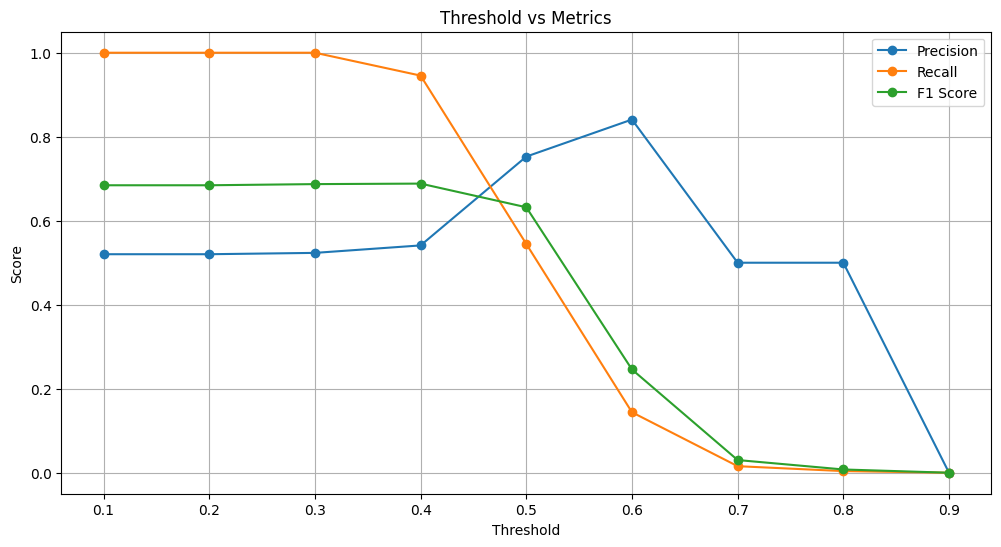

In [25]:
#Plot the metrics against the threshold values to visualize the trends more clearly
plt.figure(figsize=(12, 6))

# Plot Precision, Recall, and F1 Score
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], marker='o', label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], marker='o', label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1 Score'], marker='o', label='F1 Score')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#Find the best threshold value
best_threshold = metrics_df.loc[metrics_df['F1 Score'].idxmax(), 'Threshold']
print("Best Threshold:", best_threshold)

# Use this threshold to make predictions
y_pred_best = (y_prob >= best_threshold).astype(int)

Best Threshold: 0.4


In [27]:
#Observe how well my model is doing with this optimized threshhold value
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report with Best Threshold:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix with Best Threshold:")
print(confusion_matrix(y_test, y_pred_best))

Classification Report with Best Threshold:
              precision    recall  f1-score   support

       False       0.69      0.13      0.22       237
        True       0.54      0.95      0.69       257

    accuracy                           0.55       494
   macro avg       0.62      0.54      0.45       494
weighted avg       0.61      0.55      0.46       494

Confusion Matrix with Best Threshold:
[[ 31 206]
 [ 14 243]]


In [28]:
y_prob_new = model.predict_proba(X_test_feature_vector)[:, 1]
y_pred_new = (y_prob_new >= best_threshold).astype(int)

In [29]:
#Find the new AUC score using our improved model
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

AUC on the test data: 0.7096


In [30]:
'''Perform cross validation to see how my model will generalize to new data'''
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

In [32]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_feature_vector, y_train, cv=kf, scoring='accuracy')

In [33]:
'''From this we can see that the model does perform better than a random chance'''

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation of Accuracy:", np.std(scores))

Cross-Validation Accuracy Scores: [0.60810811 0.56418919 0.64527027 0.56756757 0.56610169]
Mean Accuracy: 0.5902473660100778
Standard Deviation of Accuracy: 0.03200919046386413


<b> Analysis: </b> Since I was using logistic regression for a binary classification problem, to tune my model and improve its performance, I tested out nine different threshold values for my model in order tofind which one led to the best accuracy and area under the roc curve score. I used a few different metrics that we used in the modules to compare the performance of the model under the different threshold values, and found that as the threshold increased, recall generally decreased as did the f1 score. The precision plateued, increased, and then generally decreased as the threshold increased, reaching a maximum value when the threshold was 0.6 and obtaining a minimum value when the threshold was 0.9. Since the f1 score represents a balance between precision and recall, the threshold with the highest f1 score is likely the best to optimize the model, which would be 0.3 according to the code cell above. Precision and Recall were important metrics to be used for this specific problem because they address the issue of a false positive rate, which is important in binary classification problems, especially for sentiment analysis because a balance of these two metrics ensures that the ratio of positive to negative predictions my model makes is fair, and isn't biased in a certain direction even though my dataset does not contain a class imbalance.

Overall, after finding a threshold value that did optimize the precision recall balance of my model, I noticed that my AUC score did increase (also it was by a small amount), but my model's performance was optimized. 